<a href="https://colab.research.google.com/github/thiagohrcosta/MachineLearning-Temperature/blob/main/scikit_learn_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
import pandas as pd
import numpy as np

In [17]:
# Reading CSV data
df = pd.read_csv("https://pycourse.s3.amazonaws.com/temperature.csv")

# Define translation dictionary
translation_dict = {
    'quente': 'hot',
    'muito quente': 'very hot',
    'confortavel': 'comfortable',
    'frio': 'cold'
}

# Translate the 'classification' column
df['classification'] = df['classification'].replace(translation_dict)

# Display the DataFrame with translated values
df

,date,temperatura,classification
0,2020-01-01,29.1,hot
1,2020-02-01,31.2,very hot
2,2020-03-01,28.5,hot
3,2020-04-01,28.0,hot
4,2020-05-01,24.0,comfortable
5,2020-06-01,20.0,cold


In [18]:
# This line extracts temperature data ('temperatura') as input features (x)
# and classification labels (y) from a DataFrame (df) for machine learning tasks.

x, y = df[['temperatura']].values, df[['classification']].values
print("X: ", x)
print("Y: ", y)

X:  [[29.1]
 [31.2]
 [28.5]
 [28. ]
 [24. ]
 [20. ]]
Y:  [['hot']
 ['very hot']
 ['hot']
 ['hot']
 ['comfortable']
 ['cold']]


In [19]:
# This line encodes categorical labels (y) using LabelEncoder from
# Scikit-learn preprocessing module, converting them into numerical format.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y.ravel())
print("Encoded Y :", y)

Encoded Y : [2 3 2 2 1 0]


In [20]:
# This code employs Scikit-learn's Logistic Regression model
# (LogisticRegression) for training on input features (x) and corresponding
# target labels (y).

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x, y)

LogisticRegression()

In [21]:
# This code generates 100 temperature values linearly spaced between 0 and 45,
# then predicts corresponding labels using a trained logistic regression
# classifier (clf).

x_test = np.linspace(start=0., stop=45., num=100).reshape(-1, 1)
y_pred = clf.predict(x_test)

print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [22]:
# This code converts the predicted numerical labels (y_pred) back to their
# original categorical values using the inverse_transform function from the
# LabelEncoder (le).

y_pred = le.inverse_transform(y_pred)

print(y_pred)

['cold' 'cold' 'cold' 'cold' 'cold' 'cold' 'cold' 'cold' 'cold' 'cold'
 'cold' 'cold' 'cold' 'cold' 'cold' 'cold' 'cold' 'cold' 'cold' 'cold'
 'cold' 'cold' 'cold' 'cold' 'cold' 'cold' 'cold' 'cold' 'cold' 'cold'
 'cold' 'cold' 'cold' 'cold' 'cold' 'cold' 'cold' 'cold' 'cold' 'cold'
 'cold' 'cold' 'cold' 'cold' 'cold' 'cold' 'cold' 'cold' 'cold' 'cold'
 'comfortable' 'comfortable' 'comfortable' 'comfortable' 'comfortable'
 'comfortable' 'hot' 'hot' 'hot' 'hot' 'hot' 'hot' 'hot' 'hot' 'hot' 'hot'
 'hot' 'hot' 'very hot' 'very hot' 'very hot' 'very hot' 'very hot'
 'very hot' 'very hot' 'very hot' 'very hot' 'very hot' 'very hot'
 'very hot' 'very hot' 'very hot' 'very hot' 'very hot' 'very hot'
 'very hot' 'very hot' 'very hot' 'very hot' 'very hot' 'very hot'
 'very hot' 'very hot' 'very hot' 'very hot' 'very hot' 'very hot'
 'very hot' 'very hot' 'very hot']


In [23]:
# This code generates an output DataFrame containing newly generated
# temperature values (new_temp) and their corresponding predicted classes
# (new_class).

output = {'new_temp': x_test.ravel(),
          'new_class': y_pred.ravel()}

output = pd.DataFrame(output)

output.head(10)

,new_temp,new_class
0,0.000000,cold
1,0.454545,cold
2,0.909091,cold
3,1.363636,cold
4,1.818182,cold
5,2.272727,cold
6,2.727273,cold
7,3.181818,cold
8,3.636364,cold
9,4.090909,cold


In [24]:
# This code provides information about the DataFrame output,
# including data types and memory usage, using the info() method.

output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   new_temp   100 non-null    float64
 1   new_class  100 non-null    object 
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [25]:
# This code generates descriptive statistics of the DataFrame output,
# including measures like count, mean, standard deviation, minimum, maximum,
# and quartiles for numerical columns.

output.describe()

,new_temp
count,100.000000
mean,22.500000
std,13.187042
min,0.000000
25%,11.250000
50%,22.500000
75%,33.750000
max,45.000000


<Axes: title={'center': '# New Values'}>

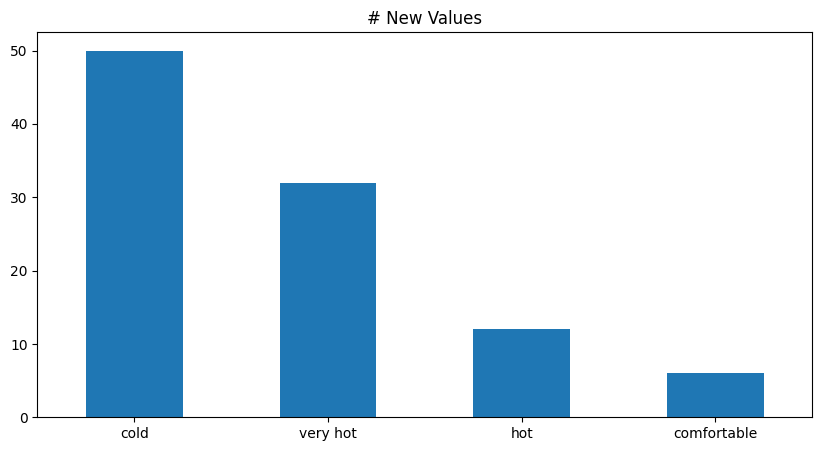

In [26]:
# This code creates a bar plot displaying the count of generated values
# for each class in the column 'new_class' within the DataFrame output,
# with a specified figure size and title.

output['new_class'].value_counts().plot.bar(figsize=(10,5),
                                            rot=0,
                                            title="# New Values")

<Axes: title={'center': 'new_temp'}, xlabel='[new_class]'>

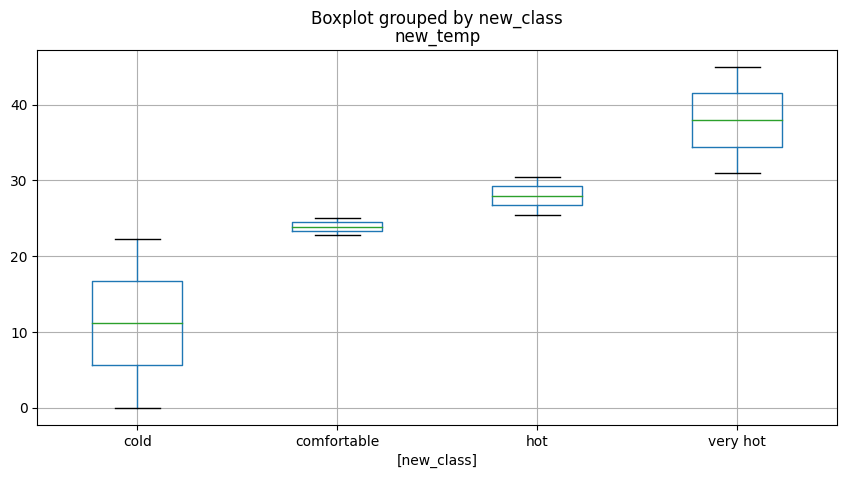

In [27]:
# BOX PLOT
output.boxplot(by='new_class', figsize=(10,5))

In [29]:
# Automatic System

def classify_temp():
  ask = True
  while ask:
    temp = input("Enter the temperature in degrees: ")
    temp = np.array(float(temp)).reshape(-1,1)

    class_temp = clf.predict(temp)
    class_temp = le.inverse_transform(class_temp)

    print(f"The classification of the temperature {temp.ravel()[0]} is: ", class_temp[0])

    ask = input("New classification (y/n):") == 'y'

In [ ]:
classify_temp()

Enter the temperature in degrees: 34
The classification of the temperature 34.0 is:  very hot
New classification (y/n):y
Enter the temperature in degrees: -12.570
The classification of the temperature -12.57 is:  cold
New classification (y/n):y
Enter the temperature in degrees: 54.22
The classification of the temperature 54.22 is:  very hot
New classification (y/n):y
Enter the temperature in degrees: 21
The classification of the temperature 21.0 is:  cold
New classification (y/n):y
Enter the temperature in degrees: 25
The classification of the temperature 25.0 is:  comfortable
